In [2]:
import pandas as pd
import altair as alt

In [3]:
df = pd.read_csv('character_list.csv', encoding='ISO-8859-1')
df
dfmap = pd.read_csv('char_mapping.csv', encoding='ISO-8859-1')
dfmetadata = pd.read_csv('metadata.csv', encoding='ISO-8859-1')
dfmetadata

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [4]:
dfmetadata.isnull().sum()
dfmetadata = dfmetadata.dropna()
dfmetadata.dtypes


script_id       int64
imdb_id        object
title          object
year            int64
gross         float64
lines_data     object
dtype: object

How the has the words, (dialogue) in movies change over time?

In [8]:
merge_meta = pd.merge(df, dfmetadata, on=['script_id'], how='inner')
merge_meta.groupby('year')['words'].sum()


<Axes: title={'center': 'Words per year'}, xlabel='year', ylabel='words'>

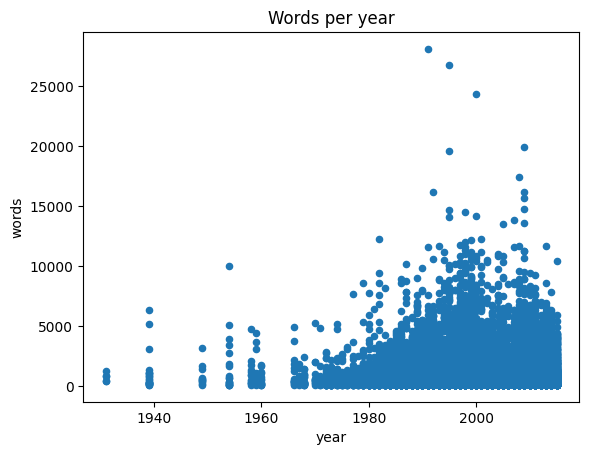

In [9]:
merge_meta.plot(kind='scatter', x='year', y='words', title='Words per year')

<Axes: title={'center': 'Words per year'}, xlabel='year'>

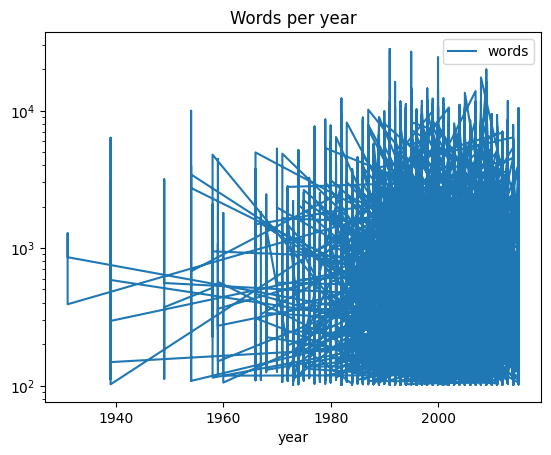

In [10]:
merge_meta.plot(kind='line', x='year', y='words', title='Words per year', logy=True)

In [13]:
merge_meta['date'] = merge_meta['year'].astype(str) + '-01-01'
merge_meta['date'] = pd.to_datetime(merge_meta['date'])

In [14]:
merge_meta = merge_meta(['year', 'gender'])['words'].sum().reset_index()
merge_meta['date'] = merge_meta['year'].astype(str) + '-01-01'
merge_meta['date'] = pd.to_datetime(merge_meta['date'])
alt.Chart(merge_meta).mark_line().encode(
    x='date:T',
    y='words',
    color='gender',
    tooltip=['date', 'words']
).properties(
    title='Dialogue Over Time Colored By Gender'
)

TypeError: 'DataFrame' object is not callable

In [15]:
base = alt.Chart(merge_meta).mark_point().encode(
    x='year',
    y='lines_data',
    tooltip=['title','year','lines_data']
).interactive().properties(
    width=500,
    height=500
)
alt.hconcat(
    base.encode(x='year:O').properties(title='hehe')
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.HConcatChart(...)